# Veri Toplama
- yfinance, investpy, quandl gibi kütüphaneler kullanılarak, 2005-01-01 tarihinden
itibaren aylık getirilere sahip hisse senetleri ve sektör verileri toplanacak.
- Web scraping ile sektörlerin ve hisse senetlerinin listesi çekilecek.

In [57]:
#!pip install yfinance
#!pip install scipy==1.14.0
#!pip install --upgrade tsfresh

In [59]:
# Veri Çekme ve İşleme
import yfinance as yf
import pandas as pd
import requests
from io import StringIO

# Web Scraping
from bs4 import BeautifulSoup

# Veri Görselleştirme
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [66]:
def fetch_sectors_names():
    url = "https://stockanalysis.com/stocks/industry/sectors/"
    response = requests.get(url)
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        df=pd.read_html(StringIO(str(soup.find_all("table"))))[0]
        
    else:
        print(f"Error: Failed to fetch data from page {url}")
        
    return df

def fetch_industry_names():
    url = "https://stockanalysis.com/stocks/industry/all/"
    response = requests.get(url)
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        df=pd.read_html(StringIO(str(soup.find_all("table"))))[0]
        
    else:
        print(f"Error: Failed to fetch data from page {url}")
        
    return df
    
def fetch_data(sectors):
    url = f"https://stockanalysis.com/stocks/sector/{sectors}/"
    response = requests.get(url)
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        df=pd.read_html(StringIO(str(soup.find_all("table"))))[0]
        df.drop(columns='No.', inplace=True)
        
    else:
        print(f"Error: Failed to fetch data from page {url}")
        
    return df

In [8]:
sectors=fetch_sectors_names()
indusrty=fetch_industry_names()

In [10]:
sectors

,Sector Name,Stocks,Market Cap,Div. Yield,PE Ratio,Profit Margin,1D Change,1Y Change
0,Financials,1272,11.96T,0.17%,15.88,19.97%,-0.56%,37.57%
1,Healthcare,1157,"8,050.42B",0.51%,59.35,3.19%,-0.64%,10.10%
2,Technology,769,21.51T,0.49%,45.77,14.62%,-1.02%,48.02%
3,Industrials,661,"5,902.02B",1.19%,29.37,7.25%,-0.60%,26.47%
4,Consumer Discretionary,561,"8,772.75B",0.75%,29.42,6.51%,-2.14%,38.69%
5,Materials,266,"2,035.83B",1.71%,27.95,6.33%,-1.00%,13.76%
6,Real Estate,263,"1,675.38B",3.78%,49.20,9.51%,-0.40%,13.67%
7,Energy,251,"3,613.08B",3.18%,13.25,8.18%,-0.05%,12.47%
8,Communication Services,245,"6,456.13B",1.46%,33.37,11.59%,-1.02%,40.95%
9,Consumer Staples,242,"4,229.57B",1.53%,29.62,4.90%,-0.38%,26.62%


In [12]:
# Çektiğim verileri, data klasörü içerisinde tutuyorum
#mkdir ..\data\stock_sectors

In [68]:
fetch_data(sectors='energy').to_csv('../data/stock_sectors/energy.csv')

fetch_data(sectors='financials').to_csv('../data/stock_sectors/financials.csv')

fetch_data(sectors='healthcare').to_csv('../data/stock_sectors/healthcare.csv')

fetch_data(sectors='technology').to_csv('../data/stock_sectors/technology.csv')

fetch_data(sectors='utilities').to_csv('../data/stock_sectors/utilities.csv')

fetch_data(sectors='real-estate').to_csv('../data/stock_sectors/real-estate.csv')

fetch_data(sectors='materials').to_csv('../data/stock_sectors/materials.csv')

fetch_data(sectors='industrials').to_csv('../data/stock_sectors/industrials.csv')

fetch_data(sectors='consumer-staples').to_csv('../data/stock_sectors/consumer-staples.csv')

fetch_data(sectors='consumer-discretionary').to_csv('../data/stock_sectors/consumer-discretionary.csv')

fetch_data(sectors='communication-services').to_csv('../data/stock_sectors/communication-services.csv')

- Hangi sütunu baz alacağımı kararlaştırmak için sütun isimlerini yazdırdım
- ['Open'] sütununu baz alacağım

In [16]:
aapl_data = yf.download("AAPL")
print(aapl_data.columns)

[*********************100%***********************]  1 of 1 completed

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])


In [19]:
aapl_data.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
1980-12-12,0.098834,0.099264,0.098834,0.098834,469033600
1980-12-15,0.093678,0.094108,0.093678,0.094108,175884800
1980-12-16,0.086802,0.087232,0.086802,0.087232,105728000
1980-12-17,0.088951,0.089381,0.088951,0.088951,86441600
1980-12-18,0.091530,0.091959,0.091530,0.091530,73449600


In [70]:
financials = pd.read_csv('../data/stock_sectors/financials.csv')
healthcare = pd.read_csv('../data/stock_sectors/healthcare.csv')
technology = pd.read_csv('../data/stock_sectors/technology.csv')

# **Tarihsel Veri Filtreleme ve En Büyük Firmaları Seçme**
    - Rastgele seçim yapmadan önce 2005 öncesi verisi olan hisseleri otomatik filtreledim
    - En büyük 3 endüstriden (Sağlık, Finans ve Teknoloji) rastgele 500 tane firma seçtim
    - Burada herhangi bir işlem yapmama gerek kalmadı çünkü zaten önceden hem boş sütunları temizledim hem de bütün veriyi 2005 tarihinden sonrası için ayarladım, kısacası sadece rastgele olarak firma seçmek kaldı

In [72]:
# Geçerli semboller (NaN veya float olmayanları aldım)
technology_tickers = technology['Symbol'].dropna().astype(str).tolist()
financials_tickers = financials['Symbol'].dropna().tolist()
healthcare_tickers = healthcare['Symbol'].dropna().tolist()

# Her bir kategoriden EN BÜYÜK 600 şirket seçtim
technology_biggest = technology_tickers[:600]
financials_biggest = financials_tickers[:600]
healthcare_biggest = healthcare_tickers[:600]

# Tüm şirketleri birleştirdim
all_biggest_tickers = technology_biggest + financials_biggest + healthcare_biggest

len(all_biggest_tickers)

1800

In [74]:
import time

# Semboller için listeyi 250'lik parçalara böldüm ki veri çekmesi kolay olsun
chunks = [all_biggest_tickers[i:i+250] for i in range(0, len(all_biggest_tickers), 250)]

# Veriyi parça parça çektim
all_data = []
for chunk in chunks:
    try:
        data = yf.download(chunk, start='2005-01-01')
        all_data.append(data)
        time.sleep(15)  # 15 saniye bekleme, API limitini aşmamak için
    except yf.download.YFRateLimitError:
        print("Rate limit exceeded. Retrying in 60 seconds...")
        time.sleep(60)

[*********************100%***********************]  250 of 250 completed
[*********************100%***********************]  250 of 250 completed
[*********************100%***********************]  250 of 250 completed

1 Failed download:
['BRK.B']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  250 of 250 completed

1 Failed download:
['AGM.A']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  250 of 250 completed

5 Failed downloads:
['TDAC']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2005-01-01 -> 2025-02-12)')
['JACS.RT', 'CRD.B', 'KFII', 'CRD.A']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  250 of 250 completed

1 Failed download:
['BIO.B']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2005-01-01 ->

```
tickers = technology['Symbol'].tolist()

# Verileri çek
data = yf.download(tickers, start='2005-01-01')
```

`TypeError: expected string or bytes-like object, got 'float'. `
- Bu hatayı aldığım için ``yfinance.download()`` fonksiyonu bir ``float`` değeri ile karşılaşıyor, fakat bu fonksiyon yalnızca ``string`` türündeki sembollerle çalışabilir. ``technology[Symbol]`` sütununda bazı ``NaN`` veya ``float`` değerleri mevcut. Bu nedenle hata veriyor
    1. NaN değerlerini temizledim
    2. Sadece string değerleri aldım
- Ekstra olarak
    - `YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')` hatası nedeniyle aralıklı veri indirdim

In [82]:
# Sonuçları birleştir
final_data = pd.concat(all_data, axis=1)

# "Open" fiyatlarını al
data_open = final_data['Open']

# Günlük verileri aylığa çeviriyoruz.
data_open_monthly = data_open.resample('M').first()

# Sonuç
print(data_open_monthly.head())

Ticker          AAPL      ACIW        ACN       ADBE        ADI        ADP  \
Date                                                                         
2005-01-31  0.974731  6.696667  19.106171  31.493821  23.208159  21.876524   
2005-02-28  1.159356  7.026667  18.113641  28.444421  22.499747  21.432076   
2005-03-31  1.353911  7.833333  18.134912  31.023913  23.340560  21.209859   
2005-04-30  1.266639  7.760000  17.702448  33.910000  22.857036  22.277329   
2005-05-31  1.089689  6.980000  15.348742  29.870001  21.419059  21.528960   

Ticker           ADSK  AFRM  AI   AKAM  ...  SCPH  SLN  SLRN       STXS  THRD  \
Date                                    ...                                     
2005-01-31  38.280256   NaN NaN  13.00  ...   NaN  NaN   NaN  91.240875   NaN   
2005-02-28  29.144969   NaN NaN  13.10  ...   NaN  NaN   NaN  86.678833   NaN   
2005-03-31  29.914572   NaN NaN  11.01  ...   NaN  NaN   NaN  86.678833   NaN   
2005-04-30  29.690001   NaN NaN  12.72  ...   Na

- 1800 şirket verisini küçük bir alan kaplaması için parquet veri tipinde sakladım ve gzip şekilden sıkıştırdım

In [96]:
data_open_monthly.to_parquet("../data/processed_data/1800_company_data.gzip", compression="gzip")

In [94]:
data_open_monthly.columns

Index(['AAPL', 'ACIW', 'ACN', 'ADBE', 'ADI', 'ADP', 'ADSK', 'AFRM', 'AI',
       'AKAM',
       ...
       'SCPH', 'SLN', 'SLRN', 'STXS', 'THRD', 'TLSI', 'UTMD', 'VOR', 'VXRT',
       'ZYBT'],
      dtype='object', name='Ticker', length=1800)

<Axes: xlabel='Date'>

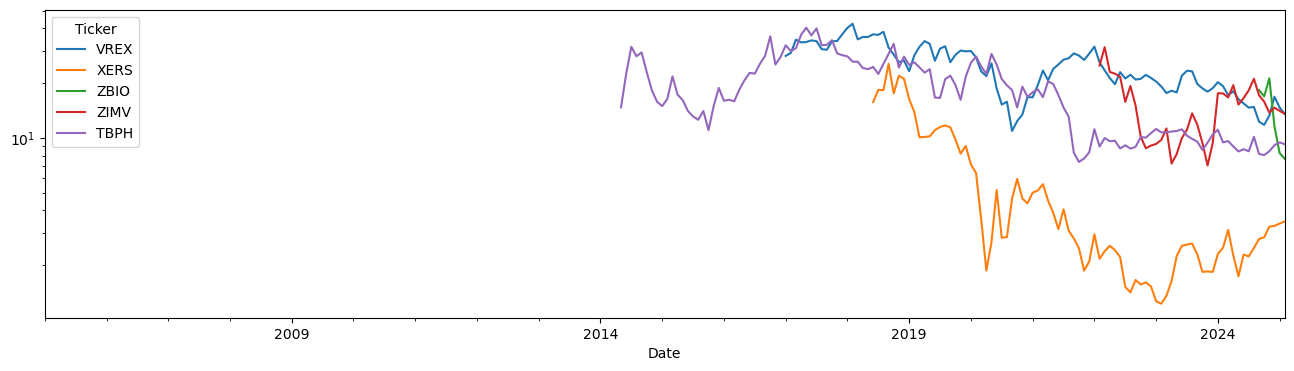

In [107]:
# Şirket isimlerini belirleyin
companies = ['VREX', 'XERS', 'ZBIO', 'ZIMV', 'TBPH']

# Veriyi sadece istenen şirketlere göre filtrele
data_open_monthly_filtered = data_open_monthly[companies]

data_open_monthly_filtered.plot(kind='line',figsize=(16,4),logy=True)

### **Hangi Durumda Eksik Verileri Doldurmak Mantıklı?**  

1. **Az sayıda eksik değer varsa** (örneğin, %10-20 civarında)  
   - `ffill().bfill()` yöntemi **önceki ve sonraki değerlere bağlı olarak makul bir dolgu** yapar.  
   - Eğer bir şirketin birkaç ay verisi eksikse ama genel trend belliyse, doldurmak **makul bir tahmin sağlar**.  
   - **Sonuç:** **Doğruluk korunur**, özellikle kısa vadeli analizlerde işe yarar.  

2. **Şirketin ticareti kesintiye uğramışsa ama sonra devam etmişse**  
   - **İlk veriler sıfır olmamalı** çünkü o dönemlerde şirket aktifti ama veriler eksikti.  
   - `mean()` kullanımı **güvenli olabilir**, ancak trendi bozabilir.  

---

### **Hangi Durumda Şirketleri Droplamak Mantıklı?**  

1. **%70-80 eksik veri varsa**  
   - Aylık açılış fiyatları gibi **trend takibi gerektiren bir veride**, aşırı boşluklar **gerçekçi olmayan tahminlere** neden olur.  
   - `ffill().bfill()` yapıldığında **ilk başta dümdüz bir çizgi olup sonra ani değişim olması**, aslında **tahmin edilen verinin hatalı olabileceğini** gösterir.  
   - **Sonuç:** **Eğer bir şirketin verisi %70-80 eksikse, bu şirketi droplamak genellikle daha güvenlidir.**  

---

### **Ne Yapmalısın?**  

#### **Seçenek 1: Çok Eksik Olan Şirketleri Filtreleyerek Dropla**  
```python
missing_ratio = data_open_monthly.isna().mean()
filtered_data = data_open_monthly.loc[:, missing_ratio < 0.3]  # %30'dan fazla eksik olanları dropla
```
- %70-80 eksik olanları tamamen çıkarırsın, geriye daha sağlam veriler kalır.

#### **Seçenek 2: Eksik Azsa Doldur `(ffill + bfill)`**
```python
filtered_data = filtered_data.ffill().bfill()
```
- Sadece az eksik olan şirketler için doldurma yapılır, daha güvenilir sonuç verir.

In [109]:
filtered_data = pd.read_parquet("../data/processed_data/1800_company_data.gzip")

In [121]:
# Her sütunun eksik veri oranını hesapla
missing_ratio = data_open_monthly.isna().mean()

# %40'tan fazla eksik veri olan sütunları drop et
filtered_data = data_open_monthly.loc[:, missing_ratio < 0.4]

# Kalan verileri ffill ve bfill ile doldur
filtered_data = filtered_data.ffill().bfill()

# Sonucu göster
print(filtered_data.head())

Ticker          AAPL      ACIW        ACN       ADBE        ADI        ADP  \
Date                                                                         
2005-01-31  0.974731  6.696667  19.106171  31.493821  23.208159  21.876524   
2005-02-28  1.159356  7.026667  18.113641  28.444421  22.499747  21.432076   
2005-03-31  1.353911  7.833333  18.134912  31.023913  23.340560  21.209859   
2005-04-30  1.266639  7.760000  17.702448  33.910000  22.857036  22.277329   
2005-05-31  1.089689  6.980000  15.348742  29.870001  21.419059  21.528960   

Ticker           ADSK   AKAM       AMAT        AMD  ...      ZYXI  CATX  CGEN  \
Date                                                ...                         
2005-01-31  38.280256  13.00  12.584156  22.110001  ...  0.146753  53.5  5.01   
2005-02-28  29.144969  13.10  11.735455  15.900000  ...  0.132078  53.5  6.22   
2005-03-31  29.914572  11.01  12.906074  17.629999  ...  0.141861  53.5  4.73   
2005-04-30  29.690001  12.72  12.035424  16.3099

<Axes: xlabel='Date'>

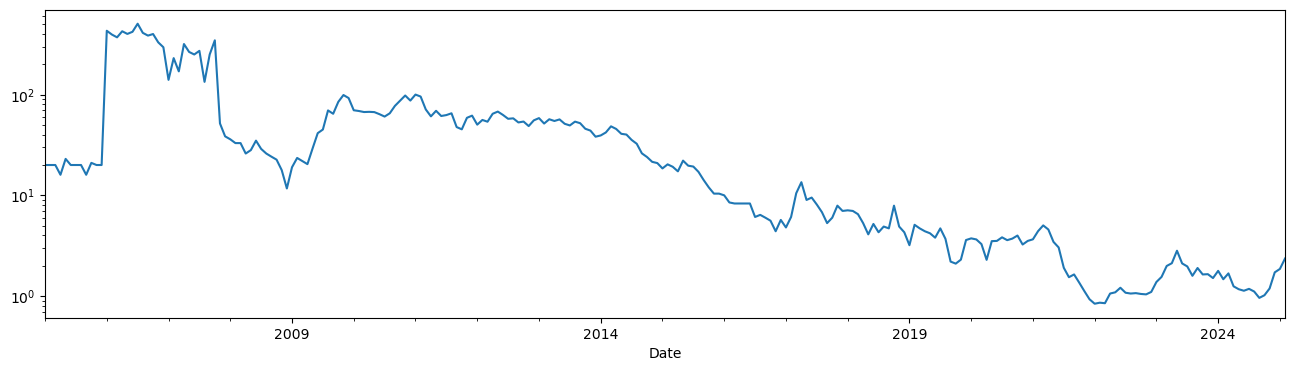

In [125]:
filtered_data['PLX'].plot(kind='line',figsize=(16,4),logy=True)

1. **`data_open_monthly.reset_index()`**
   - `long_data = filtered_data.reset_index().melt(id_vars='Date', var_name='Ticker', value_name='Open')` Bu satır, `filtered_data` verisini **uzun formata** dönüştürmek için pandas'ın `melt()` fonksiyonunu kullanır.
   - `filtered_data` bir pandas **Series** objesidir ve indeksi tarihlerdir (aylık bazda).  
   - `reset_index()`, bu diziyi bir **DataFrame**'e çevirir.  
     - **İndeks** (`Date` sütunu olarak) veriye eklenir.
     - Açılış fiyatları aynı sütunda kalır.

3. **`.melt(id_vars='Date', var_name='Ticker', value_name='Open')`**  
   - `melt()` fonksiyonu, veriyi **geniş formattan uzun formata** dönüştürür.
   - **`id_vars='Date'`** → `"Date"` sütununu korur.
   - **`var_name='Ticker'`** → Önceden sütun başlıklarında olan hisse senedi kodlarını `"Ticker"` olarak adlandırır.
   - **`value_name='Open'`** → Açılış fiyatlarını `"Open"` sütununa taşır.

---

#### **Dönüştürmeden Önce (Geniş Format)** 
| Date       | AAPL | MSFT | GOOG |  
|------------|------|------|------|  
| 2024-01-01 | 150  | 300  | 2800 |  
| 2024-02-01 | 155  | 310  | 2900 |  

#### **Dönüştürdükten Sonra (Uzun Format)**  
| Date       | Ticker | Open |  
|------------|--------|------|  
| 2024-01-01 | AAPL   | 150  |  
| 2024-01-01 | MSFT   | 300  |  
| 2024-01-01 | GOOG   | 2800 |  
| 2024-02-01 | AAPL   | 155  |  
| 2024-02-01 | MSFT   | 310  |  
| 2024-02-01 | GOOG   | 2900 |  

---

### **Neden Kullanılır?**
- Uzun format, **gruplama, filtreleme ve görselleştirme** işlemleri için daha uygundur.
- `seaborn` veya `matplotlib` ile grafik çizmek için daha kullanışlıdır.
- **Diğer veri setleriyle birleştirme** işlemleri (örneğin, sektör bilgisi eklemek) daha kolay olur.
- Ben 2. ve 3. neden için kullanıyor olacağım


In [127]:
# Uzun formata çevirme
long_data = filtered_data.reset_index().melt(id_vars='Date', var_name='Ticker', value_name='Open')

# Sektör bilgilerini ekleme
sector_map = {}
for ticker in financials_biggest:
    sector_map[ticker] = 'Financials'

for ticker in healthcare_biggest:
    sector_map[ticker] = 'Healthcare'

for ticker in technology_biggest:
    sector_map[ticker] = 'Technology'

long_data['Sector'] = long_data['Ticker'].map(sector_map)

In [129]:
long_data.head()

,Date,Ticker,Open,Sector
0,2005-01-31,AAPL,0.974731,Technology
1,2005-02-28,AAPL,1.159356,Technology
2,2005-03-31,AAPL,1.353911,Technology
3,2005-04-30,AAPL,1.266639,Technology
4,2005-05-31,AAPL,1.089689,Technology


In [131]:
# Datayı kayıt et
long_data.to_csv('../data/processed_data/combined_data.csv', index=False)

In [135]:
long_formatted_data = pd.read_csv('../data/processed_data/combined_data.csv')

In [137]:
meaningless_data_difference = long_formatted_data[
    (long_formatted_data["Ticker"].isin(["AAPL", "EYPT"])) &
    (long_formatted_data["Date"].between("2005-01-01", "2006-01-01"))
][["Date", "Ticker", "Open"]]

print(meaningless_data_difference)

              Date Ticker        Open
0       2005-01-31   AAPL    0.974731
1       2005-02-28   AAPL    1.159356
2       2005-03-31   AAPL    1.353911
3       2005-04-30   AAPL    1.266639
4       2005-05-31   AAPL    1.089689
5       2005-06-30   AAPL    1.200433
6       2005-07-31   AAPL    1.108347
7       2005-08-31   AAPL    1.281084
8       2005-09-30   AAPL    1.414399
9       2005-10-31   AAPL    1.629870
10      2005-11-30   AAPL    1.722558
11      2005-12-31   AAPL    2.074954
206910  2005-01-31   EYPT  420.000000
206911  2005-02-28   EYPT  356.000000
206912  2005-03-31   EYPT  328.000000
206913  2005-04-30   EYPT  270.000000
206914  2005-05-31   EYPT  208.000000
206915  2005-06-30   EYPT  238.000000
206916  2005-07-31   EYPT  244.399994
206917  2005-08-31   EYPT  272.000000
206918  2005-09-30   EYPT  244.000000
206919  2005-10-31   EYPT  276.399994
206920  2005-11-30   EYPT  240.000000
206921  2005-12-31   EYPT  188.000000


### Log Dönüşümü Uygulaması ve Nedenleri

Veri setinizde farklı ölçeklerde değerler gözlemlenmektedir. Örneğin, bazı Ticker'ların (ör. **AAPL**) değerleri 1 civarındayken, bazıları (ör. **EYPT**) 400 gibi yüksek değerlere sahip. Bu durum, modellerin öğrenme sürecinde farklı ölçekler arasında dengesizliğe yol açabilir.

#### Log Dönüşümünün Avantajları
- **Ölçek Dengeleme:**  
  Log dönüşümü, büyük değerlerin etkisini azaltarak tüm değerleri daha benzer bir ölçeğe çeker. Bu, özellikle farklı büyüklükteki değişkenlerin (tickerların) analizinde faydalıdır.

- **Varyansın Stabilizasyonu:**  
  Log dönüşümü, veri dağılımındaki varyansı stabil hale getirerek aşırı uç değerlerin (outlier) etkisini hafifletebilir.

- **Dağılımın Normalleşmesi:**  
  Birçok durumda log dönüşümü, verinin sağa çarpık dağılımını (right-skewed) daha normal bir dağılıma yaklaştırır, bu da bazı makine öğrenmesi algoritmalarının performansını artırabilir.

#### Dikkat Edilmesi Gerekenler
- **Pozitif Değerler:**  
  Log dönüşümünü doğrudan uygulayabilmek için verilerinizin pozitif olması gerekir. Eğer bazı değerler 0 veya negatif ise, `log1p` (yani, log(1 + x)) dönüşümü uygulanabilir.

- **Farklı Ölçekler:**  
  Her ticker için log dönüşümünü ayrı ayrı uygulamak daha mantıklı olabilir. Bu sayede, her bir zaman serisinin kendi dağılım özelliklerine göre dönüşüm yapılır.

- **Küçük Değerler:**  
  Değerlerin 1'in altında olması durumunda log dönüşümü negatif sonuçlar verecektir. Bu durum modelleme açısından problem oluşturmaz, ancak yorumlanması sırasında dikkatli olunmalıdır.

#### Sonuç
Eğer bazı değerler diğerlerine göre "mantıksız" ya da "ölçülemeyecek kadar farklı" görünüyorsa, **log dönüşümü uygulamak**:
- Büyük ölçekli değerlerin etkisini azaltır,
- Farklı tickerların değerlerini karşılaştırılabilir hale getirir,
- Makine öğrenmesi ve istatistiksel modellerde daha stabil sonuçlar elde etmenize yardımcı olur.

Bu nedenle, veri setinizdeki ölçek farklılıklarını gidermek ve istatistiksel özellikleri (örn. `tsfresh` ile çıkarılacak öznitelikler) daha tutarlı hale getirmek için log dönüşümü mantıklı bir adım olabilir.

In [139]:
long_formatted_data["Open_LOG"] = np.log1p(long_formatted_data["Open"])

#Halihazırdaki Open sütununu güncellemek yerine yeni sütun açmak daha mantıklı 
#çünkü bu kısmı tekrar tekrar çalıştırırsak Open değerleri sürekli değişiyor olacak.

In [141]:
meaningless_data_difference = long_formatted_data[
    (long_formatted_data["Ticker"].isin(["AAPL", "EYPT"])) &
    (long_formatted_data["Date"].between("2005-01-01", "2006-01-01"))
][["Date", "Ticker", "Open_LOG"]]

print(meaningless_data_difference)

              Date Ticker  Open_LOG
0       2005-01-31   AAPL  0.680432
1       2005-02-28   AAPL  0.769810
2       2005-03-31   AAPL  0.856078
3       2005-04-30   AAPL  0.818298
4       2005-05-31   AAPL  0.737015
5       2005-06-30   AAPL  0.788654
6       2005-07-31   AAPL  0.745904
7       2005-08-31   AAPL  0.824651
8       2005-09-30   AAPL  0.881450
9       2005-10-31   AAPL  0.966934
10      2005-11-30   AAPL  1.001572
11      2005-12-31   AAPL  1.123290
206910  2005-01-31   EYPT  6.042633
206911  2005-02-28   EYPT  5.877736
206912  2005-03-31   EYPT  5.796058
206913  2005-04-30   EYPT  5.602119
206914  2005-05-31   EYPT  5.342334
206915  2005-06-30   EYPT  5.476464
206916  2005-07-31   EYPT  5.502890
206917  2005-08-31   EYPT  5.609472
206918  2005-09-30   EYPT  5.501258
206919  2005-10-31   EYPT  5.625460
206920  2005-11-30   EYPT  5.484797
206921  2005-12-31   EYPT  5.241747


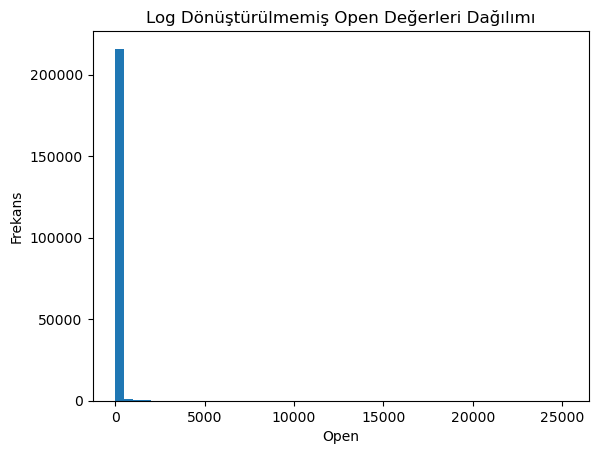

In [143]:
plt.hist(long_formatted_data["Open"], bins=50)
plt.title("Log Dönüştürülmemiş Open Değerleri Dağılımı")
plt.xlabel("Open")
plt.ylabel("Frekans")
plt.show()

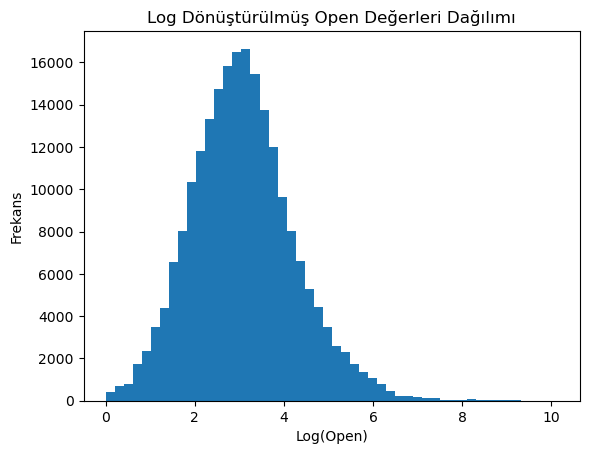

In [145]:
plt.hist(long_formatted_data["Open_LOG"], bins=50)
plt.title("Log Dönüştürülmüş Open Değerleri Dağılımı")
plt.xlabel("Log(Open)")
plt.ylabel("Frekans")
plt.show()

- **Open Değerleri**: İlk histogramdaki x=0'daki çubuk muhtemelen veri kümesinde çok sayıda sıfır veya çok küçük değerler olduğunu gösterir. Bu, Açık sütununda çok sayıda sıfır veya sıfıra yakın değer varsa meydana gelebilir. Ancak önemli olan, x'teki diğer sayıların çok büyük olmasıdır.

- **Open_LOG Değerleri**: Log dönüşümü (log1p) değerleri daha eşit bir şekilde dağılmıştır ve aşırı uç değerlerin etkisini azaltılmıştır

In [150]:
long_formatted_data.to_csv('../data/processed_data/LOG_combined_data.csv', index=False)

In [154]:
# Oluşturduğumuz tabloyu okuyalaım
combined_data = pd.read_csv('../data/processed_data/LOG_combined_data.csv')

combined_data.head()

,Date,Ticker,Open,Sector,Open_LOG
0,2005-01-31,AAPL,0.974731,Technology,0.680432
1,2005-02-28,AAPL,1.159356,Technology,0.769810
2,2005-03-31,AAPL,1.353911,Technology,0.856078
3,2005-04-30,AAPL,1.266639,Technology,0.818298
4,2005-05-31,AAPL,1.089689,Technology,0.737015


- Data-type'larında hata var ve tsfresh kütüphanesi ile çalışamam
- Hatanın nedeni, Date sütunu type olarak obect ancak datetime64 olması gerek

In [156]:
print(combined_data.dtypes)

Date         object
Ticker       object
Open        float64
Sector       object
Open_LOG    float64
dtype: object


In [158]:
# Date sütununu datetime64 formuna çevirdim
combined_data['Date'] = pd.to_datetime(combined_data['Date'])

In [160]:
print(combined_data.dtypes)

Date        datetime64[ns]
Ticker              object
Open               float64
Sector              object
Open_LOG           float64
dtype: object


## Kategorik Değişkenlerle Çalışma

Kategorik veriler, sayısal olmayan ve genellikle kategorilere ayrılan verilerdir. Örneğin, bir şirketin faaliyet gösterdiği sektör gibi kategorik bilgiler, modelleme süreçlerinde sayısal verilere dönüştürülmelidir. Kategorik verileri sayısal hale getirmek için kullanılan yaygın yöntemler **One-Hot Encoding** ve **Label Encoding**'dir.

### Sektör Verisi (Nominal Değişken)

Verimdeki **Sektör** bilgisi, **nominal** (isimsel) bir değişkendir. Yani, sektörler arasında **doğal bir sıralama** ya da **ağırlık** yoktur. Örneğin, bir şirketin teknoloji, finans veya sağlık sektöründe olması, diğer sektörlere göre daha üstün ya da daha düşük bir değer taşımaz. Her bir sektör, sadece bir isimsel kategoriyi ifade eder.

### One-Hot Encoding

Nominal veriler için, **One-Hot Encoding** yöntemi genellikle tercih edilir. Bu yöntemde, her benzersiz kategori için ayrı bir sütun oluşturulur ve gözlemde o kategoriye ait olan değer **1** ile işaretlenirken, diğerleri **0** olarak kodlanır. Bu, modelin sektöre ait kategorileri sayısal verilere dönüştürmesine olanak tanır ve herhangi bir sıralama veya ağırlık ilişkisi oluşturmaz.

Örneğin, **Sektör** değişkeninde "Teknoloji", "Finans" ve "Sağlık" gibi kategoriler varsa, One-Hot Encoding ile şu şekilde bir dönüşüm yapılır:

| Date       | Ticker | Open | Sector    | Sector_Teknoloji | Sector_Finans | Sector_Sağlık |
|------------|--------|------|-----------|------------------|---------------|---------------|
| 2022-01-01 | AAPL   | 150  | Teknoloji | 1                | 0             | 0             |
| 2022-01-02 | TSLA   | 700  | Finans    | 0                | 1             | 0             |
| 2022-01-03 | PFE    | 40   | Sağlık    | 0                | 0             | 1             |

Bu şekilde, her sektör için ayrı bir sütun eklenmiş olur ve her gözlem, o sektöre ait olan sütunda **1** değerini alırken, diğer sütunlarda **0** değerini alır. Bu, modelin sektörler arasında herhangi bir sıralama yapmamasını sağlar ve sektörel bilgiler daha doğru bir şekilde temsil edilmiş olur.


In [164]:
# One-hot encoding uygulama: 'Sector' sütununu dönüştürüyoruz.
combined_data_encoded = pd.get_dummies(combined_data, columns=['Sector'])

print(combined_data_encoded.head())

        Date Ticker      Open  Open_LOG  Sector_Financials  Sector_Healthcare  \
0 2005-01-31   AAPL  0.974731  0.680432              False              False   
1 2005-02-28   AAPL  1.159356  0.769810              False              False   
2 2005-03-31   AAPL  1.353911  0.856078              False              False   
3 2005-04-30   AAPL  1.266639  0.818298              False              False   
4 2005-05-31   AAPL  1.089689  0.737015              False              False   

   Sector_Technology  
0               True  
1               True  
2               True  
3               True  
4               True  


In [166]:
combined_data_encoded.to_csv('../data/processed_data/encoded_combined_data.csv', index=False)

# **Öznitelik Çıkarımı ve Seçme**
## **Öznitelik Çıkarımı:** 

### **tsfresh ile Otomatik Özellik Çıkarımı**
Zaman serisi analizinde, veriden istatistiksel özellikler çıkarmak modelin başarısını artırabilir. **`tsfresh`** kütüphanesi, zaman serisi verilerinden otomatik olarak öznitelik (feature) çıkarımı yaparak analitik süreçleri hızlandırır. Bu süreçte çıkarılacak bazı temel istatistiksel özellikler şunlardır:

- **Ortalama (Mean)**: Verinin genel eğilimini belirler.
- **Standart Sapma (Standard Deviation)**: Verinin ne kadar değişkenlik gösterdiğini gösterir.
- **Otokorelasyon (Autocorrelation)**: Bir zaman serisinin önceki değerleriyle olan ilişkisini ölçer.
- **Minimum ve Maksimum Değerler**: Veri setinin uç noktalarını belirler.
- **Medyan ve Çeyrek Değerler**: Veri dağılımı hakkında bilgi verir.

Ancak, **`tsfresh` ile başarılı bir öznitelik çıkarımı için veri setinde eksik değer bulunmamalıdır**. Eksik değerlerin doldurulması, sağlıklı analiz yapabilmek için kritik bir adımdır.

In [168]:
data_open_filled = pd.read_csv('../data/processed_data/encoded_combined_data.csv')

In [170]:
data_open_filled.isna().sum()

Date                 0
Ticker               0
Open                 0
Open_LOG             0
Sector_Financials    0
Sector_Healthcare    0
Sector_Technology    0
dtype: int64

In [568]:
import tsfresh
from tsfresh.feature_extraction import EfficientFCParameters

In [570]:
# Extract features using only the 'Open' column
data_extract_features = tsfresh.extract_features(
    data_open_filled,
    column_id='Ticker',
    column_sort='Date',
    column_value='Open_LOG',  # Explicitly specify the value column
    default_fc_parameters=EfficientFCParameters()
)

Feature Extraction: 100%|██████████| 30/30 [00:50<00:00,  1.68s/it]


In [572]:
data_extract_features.to_parquet('../data/processed_data/extracted_features.parquet', compression='gzip')

In [574]:
data_extract_features.columns

Index(['Open_LOG__variance_larger_than_standard_deviation',
       'Open_LOG__has_duplicate_max', 'Open_LOG__has_duplicate_min',
       'Open_LOG__has_duplicate', 'Open_LOG__sum_values',
       'Open_LOG__abs_energy', 'Open_LOG__mean_abs_change',
       'Open_LOG__mean_change', 'Open_LOG__mean_second_derivative_central',
       'Open_LOG__median',
       ...
       'Open_LOG__fourier_entropy__bins_5',
       'Open_LOG__fourier_entropy__bins_10',
       'Open_LOG__fourier_entropy__bins_100',
       'Open_LOG__permutation_entropy__dimension_3__tau_1',
       'Open_LOG__permutation_entropy__dimension_4__tau_1',
       'Open_LOG__permutation_entropy__dimension_5__tau_1',
       'Open_LOG__permutation_entropy__dimension_6__tau_1',
       'Open_LOG__permutation_entropy__dimension_7__tau_1',
       'Open_LOG__query_similarity_count__query_None__threshold_0.0',
       'Open_LOG__mean_n_absolute_max__number_of_maxima_7'],
      dtype='object', length=777)

In [576]:
extracted_data = pd.read_parquet('../data/processed_data/extracted_features.parquet')

In [578]:
extracted_data.head()

,Open_LOG__variance_larger_than_standard_deviation,Open_LOG__has_duplicate_max,Open_LOG__has_duplicate_min,Open_LOG__has_duplicate,Open_LOG__sum_values,Open_LOG__abs_energy,Open_LOG__mean_abs_change,Open_LOG__mean_change,Open_LOG__mean_second_derivative_central,Open_LOG__median,...,Open_LOG__fourier_entropy__bins_5,Open_LOG__fourier_entropy__bins_10,Open_LOG__fourier_entropy__bins_100,Open_LOG__permutation_entropy__dimension_3__tau_1,Open_LOG__permutation_entropy__dimension_4__tau_1,Open_LOG__permutation_entropy__dimension_5__tau_1,Open_LOG__permutation_entropy__dimension_6__tau_1,Open_LOG__permutation_entropy__dimension_7__tau_1,Open_LOG__query_similarity_count__query_None__threshold_0.0,Open_LOG__mean_n_absolute_max__number_of_maxima_7
A,0.0,0.0,0.0,0.0,913.803852,3586.251889,0.063168,0.009434,0.000388,3.640009,...,0.047540,0.047540,0.210003,1.703685,2.868977,3.985898,4.740089,5.092092,NaN,5.053794
AAPL,1.0,0.0,0.0,0.0,764.921929,2870.542166,0.066749,0.019755,-0.000350,3.155702,...,0.047540,0.047540,0.210003,1.606687,2.710202,3.765929,4.525950,4.966029,NaN,5.445788
AB,0.0,0.0,0.0,0.0,657.495086,1859.250052,0.062410,0.005599,-0.000013,2.678818,...,0.095013,0.142417,0.426832,1.699796,2.881841,3.992900,4.705068,5.026873,NaN,3.700294
ABBV,0.0,0.0,1.0,1.0,916.311508,3591.156249,0.034470,0.008760,0.000071,3.666718,...,0.047540,0.095013,0.225655,1.268576,2.090456,2.826554,3.266698,3.559127,NaN,5.239863
ABCB,0.0,0.0,0.0,0.0,753.473377,2445.777047,0.073705,0.006244,0.000179,3.136306,...,0.095013,0.095013,0.238762,1.736663,2.972795,4.162395,4.969204,5.265551,NaN,4.162039


### **Şirket Verilerine Endüstri Etiketi (Label) Eklenmesi**

#### **Neden Bu İşlemi Yaptık?**
Elimizde 777 farklı şirketin piyasa açılış değerlerini içeren `extracted_data` adlı veri seti bulunmaktadır. 
Ancak, bu şirketlerin hangi sektöre ait olduğunu belirten bir sütun bulunmamaktadır. 
Bu bilgiyi eklemek, **makine öğrenmesi modellerinin** şirketlerin sektör bazlı analizlerini yapabilmesini sağlar.

Şirketlerin sektörel bilgileri, `combined_data_encoded` veri setinde **one-hot encoding** formatında bulunmaktadır.
Bu veri setinde sektörler şu şekilde gösterilmektedir:

- `Sector_Technology` → **True** ise Teknoloji Sektörü
- `Sector_Financials` → **True** ise Finans Sektörü
- `Sector_Healthcare` → **True** ise Sağlık Sektörü

Bu bilgileri kullanarak her şirkete **0, 1 veya 2** olacak şekilde bir **Label** (etiket) sütunu ekledik:

- **0** → Teknoloji Şirketleri
- **1** → Finans Şirketleri
- **2** → Sağlık Şirketleri

Bu sayede `extracted_data` veri setimizde her şirketin ait olduğu sektörü belirten bir `Label` sütunu oluşturulmuş oldu.

---

### **Nasıl Yaptık?**
#### **1. Şirket-Sektör Bilgisini Çıkar**
`combined_data_encoded` veri setinden her şirketin (Ticker) sektörünü belirledik:

```python
# Şirketlerin sektörlerini içeren bir DataFrame oluştur
ticker_to_label = combined_data_encoded[['Ticker', 'Sector_Technology', 'Sector_Financials', 'Sector_Healthcare']].drop_duplicates()
```

#### **2. Sektörleri 0, 1, 2 Olarak Kodla**
Her sektör için aşağıdaki etiketleri atadık:

```python
# Şirketlerin sektörlerini belirleyen fonksiyon
def get_sector_label(row):
    if row['Sector_Financials']:
        return 0  # Teknoloji
    elif row['Sector_Healthcare']:
        return 1  # Finans
    elif row['Sector_Technology']:
        return 2  # Sağlık
    return -1  # Hata kontrolü için

# Yeni Label sütununu ekledik
ticker_to_label['Label'] = ticker_to_label.apply(get_sector_label, axis=1)

# Sadece farklı Ticker ve Label değerlerini al
ticker_to_label_unique = ticker_to_label[['Ticker', 'Label']].drop_duplicates()

# Eğer şirketler arasında tekrar varsa onları dropla
len(ticker_to_label_unique['Ticker'].unique())
```

#### **3. Şirket İsimleri ile Label Eşleştirmesi Yap**
`extracted_data` veri setinde bulunan **row, (index)** satırı, şirket isimlerini içeriyordu. 
Bu sütunu kullanarak sektör etiketlerini `extracted_data` içerisine ekledik:

```python
# Şirket isimleri ile sektörleri eşleştirerek extracted_data'ya Label sütununu ekleyelim
extracted_data = extracted_data.merge(ticker_to_label_unique, left_index=True, right_on='Ticker', how='left')
```

#### **4. Eksik Verileri Kontrol Et ve Gereksiz Sütunları Kaldır**
Her şirket için bir etiket olup olmadığını kontrol ettik:

```python
# Gereksiz fazlalıkları dropladım ve index kısmını resetledim
extracted_data = extracted_data.drop(['Label_x', 'Ticker'], axis=1).reset_index(drop=True)
```

---
#### **Sonuç**
Bu işlemler sonucunda **extracted_data** veri setine **Label** sütunu eklendi. 
Bu sütun, her şirketin hangi sektöre ait olduğunu belirtiyor (**0 = Finans, 1 = Sağlık, 2 = Teknoloji**). 
Böylece, sektör bazlı analizler ve makine öğrenmesi modelleri için daha anlamlı bir veri seti elde edilmiş oldu.

In [580]:
combined_data_encoded = pd.read_csv('../data/processed_data/encoded_combined_data.csv')

In [582]:
# Şirketlerin sektörlerini belirleyen fonksiyon
def get_sector_label(row):
    if row['Sector_Financials']:
        return 0  # Finans
    elif row['Sector_Healthcare']:
        return 1  # Sağlık
    elif row['Sector_Technology']:
        return 2  # Teknoloji
    return -1  # Hata kontrolü için

In [584]:
# Şirketlerin sektörlerini içeren bir DataFrame oluştur
ticker_to_label = combined_data_encoded[['Ticker', 'Sector_Financials', 'Sector_Healthcare', 'Sector_Technology']].drop_duplicates()

# Yeni Label sütunu ekle
ticker_to_label['Label'] = ticker_to_label.apply(get_sector_label, axis=1)

# Sadece farklı Ticker ve Label değerlerini al
ticker_to_label_unique = ticker_to_label[['Ticker', 'Label']].drop_duplicates()

# Eğer şirketler arasında tekrar varsa onları dropla
len(ticker_to_label_unique['Ticker'].unique())

900

In [586]:
# Şirket isimleri ile sektörleri eşleştirerek extracted_data'ya Label sütununu ekleyelim
extracted_data = extracted_data.merge(ticker_to_label_unique, left_index=True, right_on='Ticker', how='left')

In [592]:
# Gereksiz fazlalıkları dropladım ve index kısmını resetledim
extracted_data = extracted_data.drop(['Ticker'], axis=1).reset_index(drop=True)

# Eşleşmeyen şirketler olup olmadığını kontrol et (opsiyonel)
print(extracted_data['Label'].isna().sum(), "şirketin sektörü bulunamadı.")

extracted_data.head()

0 şirketin sektörü bulunamadı.


,Open_LOG__variance_larger_than_standard_deviation,Open_LOG__has_duplicate_max,Open_LOG__has_duplicate_min,Open_LOG__has_duplicate,Open_LOG__sum_values,Open_LOG__abs_energy,Open_LOG__mean_abs_change,Open_LOG__mean_change,Open_LOG__mean_second_derivative_central,Open_LOG__median,...,Open_LOG__fourier_entropy__bins_10,Open_LOG__fourier_entropy__bins_100,Open_LOG__permutation_entropy__dimension_3__tau_1,Open_LOG__permutation_entropy__dimension_4__tau_1,Open_LOG__permutation_entropy__dimension_5__tau_1,Open_LOG__permutation_entropy__dimension_6__tau_1,Open_LOG__permutation_entropy__dimension_7__tau_1,Open_LOG__query_similarity_count__query_None__threshold_0.0,Open_LOG__mean_n_absolute_max__number_of_maxima_7,Label
0,0.0,0.0,0.0,0.0,913.803852,3586.251889,0.063168,0.009434,0.000388,3.640009,...,0.047540,0.210003,1.703685,2.868977,3.985898,4.740089,5.092092,NaN,5.053794,1
1,1.0,0.0,0.0,0.0,764.921929,2870.542166,0.066749,0.019755,-0.000350,3.155702,...,0.047540,0.210003,1.606687,2.710202,3.765929,4.525950,4.966029,NaN,5.445788,2
2,0.0,0.0,0.0,0.0,657.495086,1859.250052,0.062410,0.005599,-0.000013,2.678818,...,0.142417,0.426832,1.699796,2.881841,3.992900,4.705068,5.026873,NaN,3.700294,0
3,0.0,0.0,1.0,1.0,916.311508,3591.156249,0.034470,0.008760,0.000071,3.666718,...,0.095013,0.225655,1.268576,2.090456,2.826554,3.266698,3.559127,NaN,5.239863,1
4,0.0,0.0,0.0,0.0,753.473377,2445.777047,0.073705,0.006244,0.000179,3.136306,...,0.095013,0.238762,1.736663,2.972795,4.162395,4.969204,5.265551,NaN,4.162039,0


In [594]:
extracted_data.columns

Index(['Open_LOG__variance_larger_than_standard_deviation',
       'Open_LOG__has_duplicate_max', 'Open_LOG__has_duplicate_min',
       'Open_LOG__has_duplicate', 'Open_LOG__sum_values',
       'Open_LOG__abs_energy', 'Open_LOG__mean_abs_change',
       'Open_LOG__mean_change', 'Open_LOG__mean_second_derivative_central',
       'Open_LOG__median',
       ...
       'Open_LOG__fourier_entropy__bins_10',
       'Open_LOG__fourier_entropy__bins_100',
       'Open_LOG__permutation_entropy__dimension_3__tau_1',
       'Open_LOG__permutation_entropy__dimension_4__tau_1',
       'Open_LOG__permutation_entropy__dimension_5__tau_1',
       'Open_LOG__permutation_entropy__dimension_6__tau_1',
       'Open_LOG__permutation_entropy__dimension_7__tau_1',
       'Open_LOG__query_similarity_count__query_None__threshold_0.0',
       'Open_LOG__mean_n_absolute_max__number_of_maxima_7', 'Label'],
      dtype='object', length=778)

In [596]:
# Boş değerler içeren sütunları bulalım
for col in extracted_data.columns:
    if extracted_data[col].isna().sum() > 0:
        print(f"Sütun ismi: {col}, boş değer sayısı: {extracted_data[col].isna().sum()}")

Sütun ismi: Open_LOG__friedrich_coefficients__coeff_0__m_3__r_30, boş değer sayısı: 187
Sütun ismi: Open_LOG__friedrich_coefficients__coeff_1__m_3__r_30, boş değer sayısı: 187
Sütun ismi: Open_LOG__friedrich_coefficients__coeff_2__m_3__r_30, boş değer sayısı: 187
Sütun ismi: Open_LOG__friedrich_coefficients__coeff_3__m_3__r_30, boş değer sayısı: 187
Sütun ismi: Open_LOG__max_langevin_fixed_point__m_3__r_30, boş değer sayısı: 187
Sütun ismi: Open_LOG__query_similarity_count__query_None__threshold_0.0, boş değer sayısı: 900


In [598]:
# Drop empty columns
extracted_data = extracted_data.dropna(axis=1, how='any')

In [600]:
extracted_data['Label'].unique()

array([1, 2, 0], dtype=int64)

In [602]:
extracted_data.to_csv('../data/processed_data/extracted_labeled_features.xlsx', index= False)

## **Öznitelik Seçme**:
- Çıkarılan özellikler arasından en önemlileri seçmek için
    - L1 regularization (Lasso),
    - Recursive Feature Elimination (RFE)

#### RFE Sonuçları:
RFE, en önemli 385 özelliği seçmiştir. Aşağıda, Random Forest modeline göre sıralanan en önemli 20 özellik yer almaktadır:

1. **Open_LOG__mean_abs_change**: 0.009998
2. **Open_LOG__fft_coefficient__attr_"real"__coeff_7**: 0.009923
3. **Open_LOG__fft_coefficient__attr_"angle"__coeff_58**: 0.008836
4. **Open_LOG__sum_of_reoccurring_values**: 0.008206
5. **Open_LOG__change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.8**: 0.008201

**En önemli 20 özellik kullanılarak elde edilen doğruluk**: 0.7167  
**Çapraz doğrulama skorları**: [0.70833333, 0.70138889, 0.625, 0.69444444, 0.69444444]  
**Ortalama çapraz doğrulama skoru**: 0.6847

#### L1 Sonuçları (Lasso):
Lasso (L1 regularization) ile 166 özellik arasından en önemli 20 özellik seçilmiştir. Aşağıda bu özellikler, Lasso katsayılarına göre sıralanmıştır:

1. **Open_LOG__fft_coefficient__attr_"real"__coeff_44**: 2.795158
2. **Open_LOG__fft_coefficient__attr_"real"__coeff_34**: 1.144467
3. **Open_LOG__fft_coefficient__attr_"real"__coeff_18**: 0.940388
4. **Open_LOG__fft_coefficient__attr_"real"__coeff_17**: 0.752983
5. **Open_LOG__fft_coefficient__attr_"imag"__coeff_20**: 0.749958

**En önemli 20 özellik kullanılarak elde edilen doğruluk (Lasso)**: 0.6944  
**Çapraz doğrulama skorları (Lasso)**: [0.72222222, 0.76388889, 0.75694444, 0.68055556, 0.72222222]  
**Ortalama çapraz doğrulama skoru (Lasso)**: 0.7292

### Sonuçların Karşılaştırılması
- **RFE** yöntemi ile seçilen en önemli 20 özelliği kullanarak elde edilen doğruluk (0.7167) ve çapraz doğrulama skoru (0.6847), **Lasso** ile seçilen özellikler ile karşılaştırıldığında daha iyi bir performans göstermektedir.
- **Lasso** yönteminin doğruluk değeri 0.6944 ile biraz daha düşük olsa da, çapraz doğrulama skorları (0.7292) biraz daha yüksek olmuştur.
- Her iki yöntem de önemli özellikleri seçmiş ve farklı doğruluk değerleri elde edilmiştir, ancak genel olarak RFE ile elde edilen sonuçlar biraz daha başarılı olmuştur.


In [46]:
# Model ve Veri İşleme Araçları
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Sınıflandırma Modelleri
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Özellik Seçimi ve Boyut İndirgeme
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA

# Ekstra: XGBoost Modeli
from xgboost import XGBClassifier

In [60]:
# Load data
extracted_labeled_data = pd.read_csv('../data/processed_data/extracted_labeled_features.xlsx')

In [104]:
# Define features and labels
X = extracted_labeled_data.drop(columns=['Label'])
y = extracted_labeled_data['Label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 1. Recursive Feature Elimination (RFE) ###
selector_rfe = RFE(RandomForestClassifier(random_state=10))
selector_rfe.fit(X_train, y_train)

# Transform datasets
X_train_rfe = selector_rfe.transform(X_train)
X_test_rfe = selector_rfe.transform(X_test)

# List selected features
selected_features_rfe = X_train.columns[selector_rfe.get_support()]
print(f"RFE Selected Features ({len(selected_features_rfe)}): {list(selected_features_rfe)}")

RFE Selected Features (385): ['Open_LOG__abs_energy', 'Open_LOG__mean_abs_change', 'Open_LOG__mean_second_derivative_central', 'Open_LOG__median', 'Open_LOG__variance', 'Open_LOG__skewness', 'Open_LOG__kurtosis', 'Open_LOG__absolute_sum_of_changes', 'Open_LOG__longest_strike_above_mean', 'Open_LOG__count_below_mean', 'Open_LOG__last_location_of_maximum', 'Open_LOG__first_location_of_maximum', 'Open_LOG__last_location_of_minimum', 'Open_LOG__percentage_of_reoccurring_values_to_all_values', 'Open_LOG__percentage_of_reoccurring_datapoints_to_all_datapoints', 'Open_LOG__sum_of_reoccurring_values', 'Open_LOG__sum_of_reoccurring_data_points', 'Open_LOG__c3__lag_1', 'Open_LOG__cid_ce__normalize_True', 'Open_LOG__cid_ce__normalize_False', 'Open_LOG__quantile__q_0.6', 'Open_LOG__quantile__q_0.7', 'Open_LOG__quantile__q_0.8', 'Open_LOG__quantile__q_0.9', 'Open_LOG__autocorrelation__lag_1', 'Open_LOG__autocorrelation__lag_2', 'Open_LOG__autocorrelation__lag_3', 'Open_LOG__autocorrelation__lag_4',

In [278]:
# RFE'nin seçtiği feature'ları scores sütununa göre listele
results = pd.DataFrame(
    data=selector_rfe.estimator_.feature_importances_,
    index=selected_features_rfe,
    columns=['scores']
)

In [294]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Sonuçları büyükten küçüğe sırala
sorted_results_desc = results.sort_values(by='scores', ascending=False)

# En önemli 20 feature'ı seç
top_20_features_rf = sorted_results_desc.index[:20]

print(f"En önemli 20 feature (Random Forest önem değerlerine göre):")
for i, feature in enumerate(top_20_features_rf, 1):
    score = sorted_results_desc.loc[feature, 'scores']
    print(f"{i}. {feature}: {score:.6f}")


En önemli 20 feature (Random Forest önem değerlerine göre):
1. Open_LOG__mean_abs_change: 0.009998
2. Open_LOG__fft_coefficient__attr_"real"__coeff_7: 0.009923
3. Open_LOG__fft_coefficient__attr_"angle"__coeff_58: 0.008836
4. Open_LOG__sum_of_reoccurring_values: 0.008206
5. Open_LOG__change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.8: 0.008201
6. Open_LOG__change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.2: 0.007394
7. Open_LOG__fft_coefficient__attr_"real"__coeff_94: 0.007320
8. Open_LOG__fft_coefficient__attr_"real"__coeff_34: 0.007298
9. Open_LOG__change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.0: 0.007214
10. Open_LOG__percentage_of_reoccurring_values_to_all_values: 0.007091
11. Open_LOG__change_quantiles__f_agg_"mean"__isabs_True__qh_1.0__ql_0.6: 0.007058
12. Open_LOG__change_quantiles__f_agg_"var"__isabs_False__qh_1.0__ql_0.4: 0.006988
13. Open_LOG__fft_coefficient__attr_"real"__coeff_11: 0.006836
14. Open_LOG__fft_coefficient__attr_"real"__coeff_90: 0.00

In [296]:
# Bu feature'ları kullanarak yeni veri setleri oluştur
X_train_top20_rf = X_train[top_20_features_rf]
X_test_top20_rf = X_test[top_20_features_rf]

# Model oluştur ve eğit
rf_model_top20 = RandomForestClassifier(random_state=10)
rf_model_top20.fit(X_train_top20_rf, y_train)

# Test seti üzerinde tahmin yap
y_pred_top20_rf = rf_model_top20.predict(X_test_top20_rf)

In [298]:
### 2. L1 Regularization (Lasso) ###
lasso = LogisticRegression(penalty="l1", solver="liblinear", random_state=10)
lasso.fit(X_train, y_train)

# Select non-zero coefficient features
selected_features_lasso = X_train.columns[lasso.coef_[0] != 0]
X_train_lasso = X_train[selected_features_lasso]
X_test_lasso = X_test[selected_features_lasso]

print(f"Lasso Selected Features ({len(selected_features_lasso)}): {list(selected_features_lasso)}")

Lasso Selected Features (166): ['Open_LOG__sum_values', 'Open_LOG__abs_energy', 'Open_LOG__length', 'Open_LOG__longest_strike_above_mean', 'Open_LOG__count_above_mean', 'Open_LOG__count_below_mean', 'Open_LOG__sum_of_reoccurring_values', 'Open_LOG__sum_of_reoccurring_data_points', 'Open_LOG__c3__lag_1', 'Open_LOG__c3__lag_2', 'Open_LOG__c3__lag_3', 'Open_LOG__number_cwt_peaks__n_1', 'Open_LOG__number_cwt_peaks__n_5', 'Open_LOG__number_peaks__n_1', 'Open_LOG__number_peaks__n_3', 'Open_LOG__number_peaks__n_10', 'Open_LOG__spkt_welch_density__coeff_2', 'Open_LOG__fft_coefficient__attr_"real"__coeff_0', 'Open_LOG__fft_coefficient__attr_"real"__coeff_1', 'Open_LOG__fft_coefficient__attr_"real"__coeff_2', 'Open_LOG__fft_coefficient__attr_"real"__coeff_3', 'Open_LOG__fft_coefficient__attr_"real"__coeff_4', 'Open_LOG__fft_coefficient__attr_"real"__coeff_5', 'Open_LOG__fft_coefficient__attr_"real"__coeff_7', 'Open_LOG__fft_coefficient__attr_"real"__coeff_8', 'Open_LOG__fft_coefficient__attr_"re

In [306]:
### 2. L1 Regularization (Lasso) için özellik önem değerlerini hesaplayalım ###
# L1 katsayılarının mutlak değerlerini alarak özellik önem sıralaması oluştur
feature_importance_lasso = pd.DataFrame({
    'scores': np.abs(lasso.coef_[0]),
    'names': X_train.columns
})
feature_importance_lasso = feature_importance_lasso.set_index('names')

# Sonuçları büyükten küçüğe sırala
sorted_results_lasso_desc = feature_importance_lasso.sort_values(by='scores', ascending=False)

# En önemli 20 feature'ı seç
top_20_features_lasso = sorted_results_lasso_desc.index[:20]
print(f"En önemli 20 feature (Lasso katsayılarına göre):")
for i, feature in enumerate(top_20_features_lasso, 1):
    score = sorted_results_lasso_desc.loc[feature, 'scores']
    print(f"{i}. {feature}: {score:.6f}")

En önemli 20 feature (Lasso katsayılarına göre):
1. Open_LOG__fft_coefficient__attr_"real"__coeff_44: 2.795158
2. Open_LOG__fft_coefficient__attr_"real"__coeff_34: 1.144467
3. Open_LOG__fft_coefficient__attr_"real"__coeff_18: 0.940388
4. Open_LOG__fft_coefficient__attr_"real"__coeff_17: 0.752983
5. Open_LOG__fft_coefficient__attr_"imag"__coeff_20: 0.749958
6. Open_LOG__fft_coefficient__attr_"real"__coeff_24: 0.662814
7. Open_LOG__fft_coefficient__attr_"real"__coeff_20: 0.480475
8. Open_LOG__fft_coefficient__attr_"imag"__coeff_18: 0.461297
9. Open_LOG__fft_coefficient__attr_"abs"__coeff_25: 0.423871
10. Open_LOG__fft_coefficient__attr_"abs"__coeff_10: 0.419204
11. Open_LOG__fft_coefficient__attr_"imag"__coeff_8: 0.413403
12. Open_LOG__fft_coefficient__attr_"real"__coeff_16: 0.370956
13. Open_LOG__fft_coefficient__attr_"imag"__coeff_2: 0.338724
14. Open_LOG__fft_coefficient__attr_"real"__coeff_11: 0.326932
15. Open_LOG__fft_coefficient__attr_"imag"__coeff_27: 0.321631
16. Open_LOG__fft_c

In [308]:
# Bu feature'ları kullanarak yeni veri setleri oluştur
X_train_top20_lasso = X_train[top_20_features_lasso]
X_test_top20_lasso = X_test[top_20_features_lasso]

# Model oluştur ve eğit (Lojistik Regresyon kullanıyoruz çünkü Lasso bir özellik seçim yöntemidir)
lr_model_top20 = LogisticRegression(random_state=10)
lr_model_top20.fit(X_train_top20_lasso, y_train)

# Test seti üzerinde tahmin yap
y_pred_top20_lasso = lr_model_top20.predict(X_test_top20_lasso)

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [310]:
# Doğruluk (accuracy) hesapla RFE
accuracy_top20_rf = accuracy_score(y_test, y_pred_top20_rf)
print(f"\nEn önemli 20 feature kullanılarak elde edilen doğruluk: {accuracy_top20_rf:.4f}")

# Çapraz doğrulama yap RFE
cv_scores_top20_rf = cross_val_score(rf_model_top20, X_train_top20_rf, y_train, cv=5, scoring='accuracy')
print(f"Çapraz doğrulama skorları: {cv_scores_top20_rf}")
print(f"Ortalama çapraz doğrulama skoru: {cv_scores_top20_rf.mean():.4f}")

#------------------------------------------------------------------------------------------------------------------------

# Doğruluk (accuracy) hesapla Lasoo
accuracy_top20_lasso = accuracy_score(y_test, y_pred_top20_lasso)
print(f"\nEn önemli 20 feature kullanılarak elde edilen doğruluk (Lasso): {accuracy_top20_lasso:.4f}")

# Çapraz doğrulama yap Lasso
cv_scores_top20_lasso = cross_val_score(lr_model_top20, X_train_top20_lasso, y_train, cv=5, scoring='accuracy')
print(f"Çapraz doğrulama skorları (Lasso): {cv_scores_top20_lasso}")
print(f"Ortalama çapraz doğrulama skoru (Lasso): {cv_scores_top20_lasso.mean():.4f}")


En önemli 20 feature kullanılarak elde edilen doğruluk: 0.7167
Çapraz doğrulama skorları: [0.70833333 0.70138889 0.625      0.69444444 0.69444444]
Ortalama çapraz doğrulama skoru: 0.6847

En önemli 20 feature kullanılarak elde edilen doğruluk (Lasso): 0.6944
Çapraz doğrulama skorları (Lasso): [0.72222222 0.76388889 0.75694444 0.68055556 0.72222222]
Ortalama çapraz doğrulama skoru (Lasso): 0.7292


D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

C:\Users\only_\AppData\Local\Temp\ipykernel_8136\151639754.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1400x600 with 0 Axes>

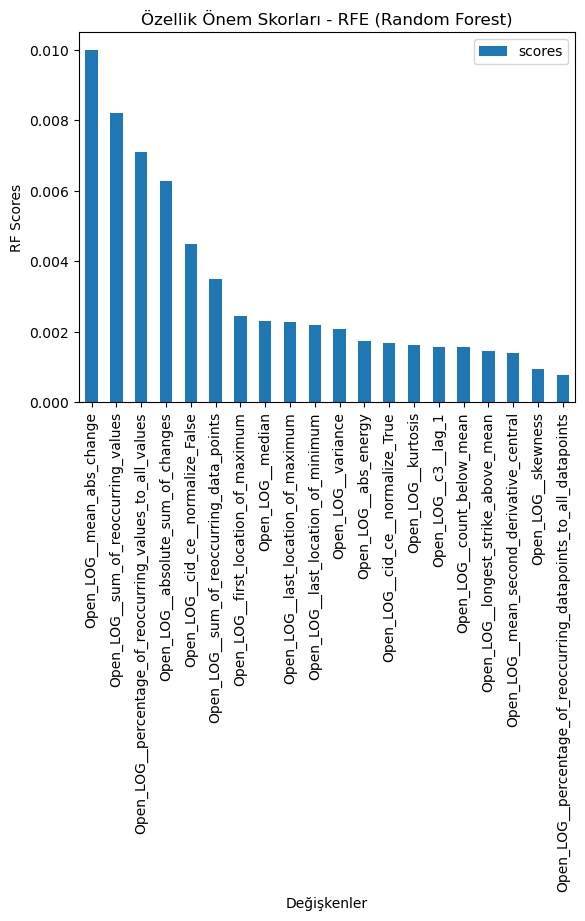

In [312]:
# Feature importance values for RFE (Random Forest)
results_of_20_best_feature = pd.DataFrame(
    data=selector_rfe.estimator_.feature_importances_[:20],
    index=selected_features_rfe[:20],
    columns=['scores']
)
# Visualize importance scores
plt.figure(figsize=(14, 6))
results_of_20_best_feature.sort_values(by='scores', ascending=False).plot.bar(
    title='Özellik Önem Skorları - RFE (Random Forest)'
)
plt.xlabel('Değişkenler')
plt.ylabel('RF Scores')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [173]:
results_of_20_best_feature

,scores
Open_LOG__abs_energy,0.001734
Open_LOG__mean_abs_change,0.009998
Open_LOG__mean_second_derivative_central,0.001394
Open_LOG__median,0.002302
Open_LOG__variance,0.002074
Open_LOG__skewness,0.000933
Open_LOG__kurtosis,0.001612
Open_LOG__absolute_sum_of_changes,0.006284
Open_LOG__longest_strike_above_mean,0.001458
Open_LOG__count_below_mean,0.001547


In [123]:
import os
import joblib  # Modeli yüklemek için

# Kayıt dizinini oluştur (eğer yoksa)
save_dir = "../trained_models/"
os.makedirs(save_dir, exist_ok=True)

# Random Forest modelini kaydet
rf_model_path = os.path.join(save_dir, "rf_model_top20.pkl")
joblib.dump(rf_model_top20, rf_model_path)

# Logistic Regression modelini kaydet
lr_model_path = os.path.join(save_dir, "lr_model_top20_lasso.pkl")
joblib.dump(lr_model_top20, lr_model_path)

print(f"Modeller şu dizine kaydedildi: {save_dir}")

Modeller şu dizine kaydedildi: ../trained_models/


# Model Geliştirme

In [330]:
# Gerekli kütüphaneleri içe aktaralım
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [332]:
# Label encoding (eğer label'lar string ise)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [334]:
# Farklı modelleri tanımla
models = {
    # Temel modeller
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=0),
    "SVC": SVC(random_state=0, probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=10),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=10),
    
    # Gelişmiş modeller
    "XGBoost": XGBClassifier(n_estimators=100, random_state=10, use_label_encoder=False, eval_metric='logloss'),
    "MLP Classifier": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=0),
    
    # Ek modeller
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=10),
    "Ridge Classifier": RidgeClassifier(random_state=0),
    "KNeighbors": KNeighborsClassifier(n_neighbors=5),
    "Gaussian NB": GaussianNB()
}

In [336]:
import os
import joblib  # Modeli yüklemek için

# Kayıt dizinini oluştur (eğer yoksa)
save_dir = "../trained_models/"
os.makedirs(save_dir, exist_ok=True)

# Sonuçları tutacak liste
results = []

# Her modeli eğit, test et ve accuracy score hesapla
for model_name, model in models.items():
    print(f"\n{model_name} eğitiliyor...")
    model.fit(X_train_rfe, y_train_encoded)  # Modeli eğit
    y_pred = model.predict(X_test_rfe)  # Test verisiyle tahmin yap
    
    # Model dosya adını oluştur ve kaydet
    model_filename = os.path.join(save_dir, f"{model_name.replace(' ', '_')}.pkl")
    joblib.dump(model, model_filename)  # Modeli kaydet
    print(f"{model_name} kaydedildi: {model_filename}")
    
    acc = accuracy_score(y_test_encoded, y_pred)  # Accuracy hesapla
    print(f"{model_name} Accuracy: {acc:.4f}")
    
    target_names = [str(cls) for cls in label_encoder.classes_]
    # Classification report yazdır
    print(classification_report(y_test_encoded, y_pred, target_names=target_names))
    
    # Sonuçları sakla
    results.append((model_name, acc))

# En iyi modeli bul
best_model = max(results, key=lambda x: x[1])
print(f"\nEn iyi model: {best_model[0]} (Accuracy: {best_model[1]:.4f})")


Logistic Regression eğitiliyor...


D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression kaydedildi: ../trained_models/Logistic_Regression.pkl
Logistic Regression Accuracy: 0.7111
              precision    recall  f1-score   support

           0       0.81      0.75      0.77        83
           1       0.70      0.62      0.66        48
           2       0.60      0.73      0.66        49

    accuracy                           0.71       180
   macro avg       0.70      0.70      0.70       180
weighted avg       0.72      0.71      0.71       180


SVC eğitiliyor...
SVC kaydedildi: ../trained_models/SVC.pkl
SVC Accuracy: 0.5944
              precision    recall  f1-score   support

           0       0.68      0.77      0.72        83
           1       0.57      0.25      0.35        48
           2       0.48      0.63      0.54        49

    accuracy                           0.59       180
   macro avg       0.58      0.55      0.54       180
weighted avg       0.60      0.59      0.57       180


Random Forest eğitiliyor...
Random Forest ka

D:\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:09:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost kaydedildi: ../trained_models/XGBoost.pkl
XGBoost Accuracy: 0.8056
              precision    recall  f1-score   support

           0       0.89      0.88      0.88        83
           1       0.82      0.75      0.78        48
           2       0.67      0.73      0.70        49

    accuracy                           0.81       180
   macro avg       0.79      0.79      0.79       180
weighted avg       0.81      0.81      0.81       180


MLP Classifier eğitiliyor...
MLP Classifier kaydedildi: ../trained_models/MLP_Classifier.pkl
MLP Classifier Accuracy: 0.5611
              precision    recall  f1-score   support

           0       0.71      0.64      0.67        83
           1       0.45      0.52      0.48        48
           2       0.47      0.47      0.47        49

    accuracy                           0.56       180
   macro avg       0.54      0.54      0.54       180
weighted avg       0.57      0.56      0.57       180


AdaBoost eğitiliyor...
AdaBoost kayd

In [337]:
# Sonuçları DataFrame olarak göster
results_df = pd.DataFrame(results, columns=["Model", "Test Accuracy"])
print("\nModel Performances:")
print(results_df.sort_values(by="Test Accuracy", ascending=False))


Model Performances:
                 Model  Test Accuracy
3    Gradient Boosting       0.816667
4              XGBoost       0.805556
7     Ridge Classifier       0.794444
2        Random Forest       0.755556
6             AdaBoost       0.727778
0  Logistic Regression       0.711111
9          Gaussian NB       0.600000
1                  SVC       0.594444
5       MLP Classifier       0.561111
8           KNeighbors       0.483333


- En iyi sonucu Gradient Boosting verdiği için bu model ile devam edeceğim ve bu modeli geliştirmek için Hiperparametre Optimizasyonu ve Cross-Validation işlemleri yapacağım

# **Sektörel Benzerlik Analizi**

In [198]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import tsfresh
from tsfresh.feature_extraction import EfficientFCParameters
import joblib  # Modeli yüklemek için

In [258]:
# --- 1. Veri İşleme Fonksiyonları ---
def preprocess_open_values(df):
    """ Open değerlerini işleyip log dönüşümü uygular ve 2005'ten itibaren filtreler. """
    df_data = yf.download(df, start='2005-01-01')

    df_open_data = df_data['Open'] # Sadece open verisini al
    df_open_data = df_open_data.ffill().fillna(0) # İlk ffill, sonra bütün boş değerleri 0 ile doldur
    df_open_data = df_open_data.resample('M').first() # Günlük verileri aylığa çevir.

    df_open_data_long = df_open_data.reset_index().melt(id_vars='Date', var_name='Ticker', value_name='Open') # Long türüne çevir

    df_open_data_long['Open_LOG'] = np.log1p(df_open_data_long['Open']) # Open değerlerinin, Log1/y değerini al
    return df_open_data_long[['Date', 'Ticker', 'Open_LOG']]

In [260]:
# --- 2. Özellik Çıkarma Fonksiyonu ---
def extract_features(df):
    """ Open_LOG üzerinden özellik çıkarır ve seçili olanları döndürür. """
    features = tsfresh.extract_features(
        df,
        column_id='Ticker',
        column_sort='Date',
        column_value='Open_LOG',
        default_fc_parameters=EfficientFCParameters()
    )

    return features[selected_features_rfe]

In [262]:
# --- 3. Pipeline Tanımlama ---
data_pipeline = Pipeline([
    ('preprocessing', FunctionTransformer(preprocess_open_values)),  # Open işlemleri
    ('feature_extraction', FunctionTransformer(extract_features)),  # Tsfresh özellik çıkarımı
])

In [264]:
# --- 4. Model Yükleme ---
mlp_model = joblib.load("../trained_models/Gradient_Boosting.pkl")  # Eğittiğin MLP modelini yükle

In [266]:
def predict_sector(df):
    """ İşlenmiş veriyi modele sokar ve sektöre olan olasılıklarını döndürür. """
    X_processed = data_pipeline.transform(df)
    probabilities = mlp_model.predict_proba(X_processed)[0]  # Olasılıkları al

    sector_mapping = {0: 'Financials', 1: 'Healthcare', 2: 'Technology'}

    # Yuvarlanmış olasılıkları bir sözlük olarak döndür
    sector_probabilities = {sector_mapping[i]: round(prob, 4) for i, prob in enumerate(probabilities)}

    return sector_probabilities

In [268]:
# --- 6. Kullanım ---
# Örnek olarak seçilen endüstri şirketi verisi (Industrials, Materials vs.)
df_selected_company = pd.read_csv("../data/stock_sectors/real-estate.csv")  # Örnek dosya (inşaat şirketleri)
df_selected_company_ticker = df_selected_company['Symbol'].dropna().tolist() # Tüm şirketler
df_selected_company_ticker_random = df_selected_company_ticker[5] # 5. Şirket (herhangi bir sayı olabilir)

In [274]:
predicted_sector = predict_sector(df_selected_company_ticker_random)

[*********************100%***********************]  1 of 1 completed
Feature Extraction: 100%|██████████| 1/1 [00:06<00:00,  6.36s/it]

Bu şirket en çok şu sektöre benziyor: {'Financials': 0.0557, 'Healthcare': 0.7635, 'Technology': 0.1808}



D:\Anaconda\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


In [276]:
# Sonuç
print(f"Bu şirket en çok şu sektöre benziyor: {predicted_sector}")

Bu şirket en çok şu sektöre benziyor: {'Financials': 0.0557, 'Healthcare': 0.7635, 'Technology': 0.1808}
